# 1. 주요 라이브러리 임포트 및 설정

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# column 생략없이 출력
pd.set_option('display.max_columns', None)
data = pd.read_csv("../data_9.csv", low_memory=False)

# random_seed 설정
random_seed = 2023

# 2. 데이터 살펴보기

In [2]:
data.head()

,index,allInPings,assistMePings,assists,baitPings,baronKills,basicPings,bountyLevel,champExperience,champLevel,championId,championName,championTransform,commandPings,consumablesPurchased,damageDealtToBuildings,damageDealtToObjectives,damageDealtToTurrets,damageSelfMitigated,dangerPings,deaths,detectorWardsPlaced,doubleKills,dragonKills,eligibleForProgression,enemyMissingPings,enemyVisionPings,firstBloodAssist,firstBloodKill,firstTowerAssist,firstTowerKill,gameEndedInEarlySurrender,gameEndedInSurrender,getBackPings,goldEarned,goldSpent,holdPings,individualPosition,inhibitorKills,inhibitorTakedowns,inhibitorsLost,item0,item1,item2,item3,item4,item5,item6,itemsPurchased,killingSprees,kills,lane,largestCriticalStrike,largestKillingSpree,largestMultiKill,longestTimeSpentLiving,magicDamageDealt,magicDamageDealtToChampions,magicDamageTaken,needVisionPings,neutralMinionsKilled,nexusKills,nexusLost,nexusTakedowns,objectivesStolen,objectivesStolenAssists,onMyWayPings,participantId,pentaKills,physicalDamageDealt,physicalDamageDealtToChampions,physicalDamageTaken,profileIcon,pushPings,puuid,quadraKills,riotIdName,riotIdTagline,role,sightWardsBoughtInGame,spell1Casts,spell2Casts,spell3Casts,spell4Casts,summoner1Casts,summoner1Id,summoner2Casts,summoner2Id,summonerId,summonerLevel,summonerName,teamEarlySurrendered,teamId,teamPosition,timeCCingOthers,timePlayed,totalAllyJungleMinionsKilled,totalDamageDealt,totalDamageDealtToChampions,totalDamageShieldedOnTeammates,totalDamageTaken,totalEnemyJungleMinionsKilled,totalHeal,totalHealsOnTeammates,totalMinionsKilled,totalTimeCCDealt,totalTimeSpentDead,totalUnitsHealed,tripleKills,trueDamageDealt,trueDamageDealtToChampions,trueDamageTaken,turretKills,turretTakedowns,turretsLost,unrealKills,visionClearedPings,visionScore,visionWardsBoughtInGame,wardsKilled,wardsPlaced,win,challenges.12AssistStreakCount,challenges.abilityUses,challenges.acesBefore15Minutes,challenges.alliedJungleMonsterKills,challenges.baronTakedowns,challenges.blastConeOppositeOpponentCount,challenges.bountyGold,challenges.buffsStolen,challenges.completeSupportQuestInTime,challenges.controlWardTimeCoverageInRiverOrEnemyHalf,challenges.controlWardsPlaced,challenges.damagePerMinute,challenges.damageTakenOnTeamPercentage,challenges.dancedWithRiftHerald,challenges.deathsByEnemyChamps,challenges.dodgeSkillShotsSmallWindow,challenges.doubleAces,challenges.dragonTakedowns,challenges.earlyLaningPhaseGoldExpAdvantage,challenges.effectiveHealAndShielding,challenges.elderDragonKillsWithOpposingSoul,challenges.elderDragonMultikills,challenges.enemyChampionImmobilizations,challenges.enemyJungleMonsterKills,challenges.epicMonsterKillsNearEnemyJungler,challenges.epicMonsterKillsWithin30SecondsOfSpawn,challenges.epicMonsterSteals,challenges.epicMonsterStolenWithoutSmite,challenges.firstTurretKilled,challenges.firstTurretKilledTime,challenges.flawlessAces,challenges.fullTeamTakedown,challenges.gameLength,challenges.getTakedownsInAllLanesEarlyJungleAsLaner,challenges.goldPerMinute,challenges.hadOpenNexus,challenges.immobilizeAndKillWithAlly,challenges.initialBuffCount,challenges.initialCrabCount,challenges.jungleCsBefore10Minutes,challenges.junglerTakedownsNearDamagedEpicMonster,challenges.kTurretsDestroyedBeforePlatesFall,challenges.kda,challenges.killAfterHiddenWithAlly,challenges.killParticipation,challenges.killedChampTookFullTeamDamageSurvived,challenges.killingSprees,challenges.killsNearEnemyTurret,challenges.killsOnOtherLanesEarlyJungleAsLaner,challenges.killsOnRecentlyHealedByAramPack,challenges.killsUnderOwnTurret,challenges.killsWithHelpFromEpicMonster,challenges.knockEnemyIntoTeamAndKill,challenges.landSkillShotsEarlyGame,challenges.laneMinionsFirst10Minutes,challenges.laningPhaseGoldExpAdvantage,challenges.legendaryCount,challenges.lostAnInhibitor,challenges.maxCsAdvantageOnLaneOpponent,challenges.maxKillDeficit,challenges.maxLevelLeadLaneOpponent,challenges.mejaisFullStackInTime,challenges.moreEnemyJungleThanOpponent,challenges.multiKill

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172000 entries, 0 to 171999
Columns: 259 entries, index to gameDuration
dtypes: bool(8), float64(231), int64(3), object(17)
memory usage: 330.7+ MB


## 2-1. 칼럼 정리

- 칼럼이 너무 많아서 중요한 칼럼만 선정한다.
- challenges.

## 2-2. 티어별 데이터 수

데이터를 모으다보니 높은 티어의 데이터가 많이 모였다. 조금 쳐내야 될듯하다. 게임하는 사람들의 대부분은 실버 골드이기 때문이다.

<AxesSubplot:>

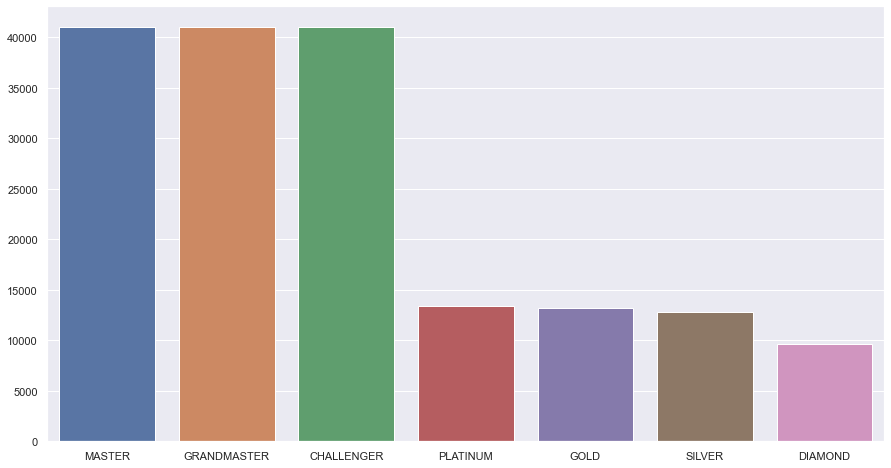

In [4]:
tier_counts = pd.DataFrame(data['tier'].value_counts())
sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(data = tier_counts.T)

## 2-3. 라인별 데이터 수

라인별 데이터는 균등하다.

<AxesSubplot:>

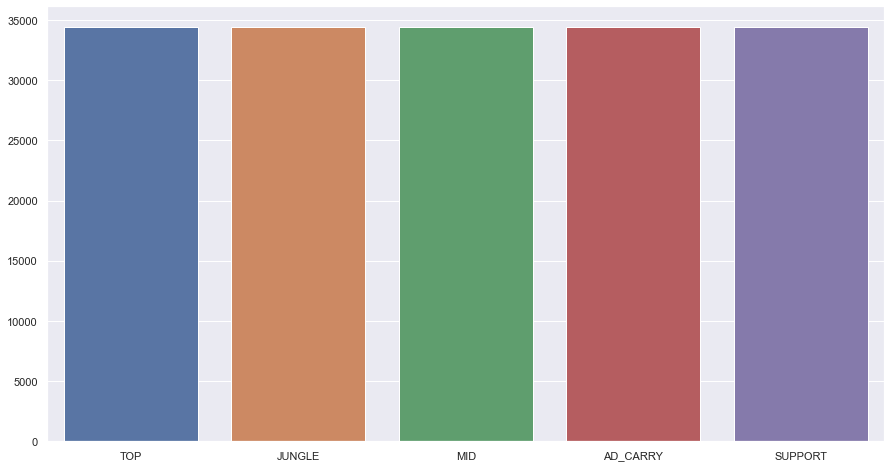

In [5]:
position_counts = pd.DataFrame(data['position'].value_counts())
sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(data = position_counts.T)

# 3. 데이터 전처리

## 3-1. 칼럼 정리하기

내가 직접 게임하면서 생각했던 중요 칼럼들로 구성을 하였다. 물론 추후, 상관관계 분석을 통해 통계적으로도 찾아볼 생각이다.

- `position` : 라인은 중요한 칼럼이다. 미드, 탑, 원딜의 경우에는 딜량이 상대적으로 높을 확률이 높고, 서포터는 적을 확률이 높다. 따라서 필수적이라고 생각했다.

- `tier` : 티어에 따라 cs 수급률이 높고 따라서 챔프레벨이 높을 수 있다. 그리고 게임을 굴리는 스노우볼 속도가 높아서 게임시간이 적을 것이다.

- `gameDuration` : 게임시간을 그자체로 활용하기 보다는 골드 수급량이나 킬, 딜량 등을 게임시간으로 나눠서 활용할 가치가 있다.

- `champLevel` : 아이템이 하나 더 많은 것보다 레벨이 높은게 더 좋다.

- `Kills`. `deaths`, `assists` : 당연히 중요함.

- `totalDamageDealtToChampions` : 딜량. 소위 말하는 **실력 그래프**.

- `damageSelfMitigated` : 자신에 대한 피해 감소량. 탱커에게 중요 지표. 일반적으로 받은 피해량이 중요하다고 생각할 수 있지만, 탱커들은 방어력, 마법저항력 위주로 가기 때문에 해당 지표가 더 중요할 것이다.

- `totalHeal` : 소라카같은 힐러나 리신, 벨베스, 워윅, 모데카이저 등 브루저들에게 중요한 지표이다.

- `totalMinionsKilled`, `neutralMinionsKilled` : 둘이 합치면 소위 말하는 **CS**. 전자는 우리가 아는 미니언에 대한 지표이며 후자는 정글몹이나 와드 등에 대한 지표일 것이다.

- `wardsPlaced`, `wardsKilled`, `visionScore` : 시야 또한 티어가 높이 올라갈수록 중요한 부분. 특히, 서포터에게 중요한 지표이다.

- `win` : 승리여부. 종속변수이다.

In [6]:
data = data[["position", "tier", "gameDuration", "champLevel", "kills", "deaths", "assists", "totalDamageDealtToChampions", "damageSelfMitigated", "totalHeal", "totalMinionsKilled", "neutralMinionsKilled", "wardsPlaced","wardsKilled","visionScore" ,"win"]]

In [7]:
data.describe()

,gameDuration,champLevel,kills,deaths,assists,totalDamageDealtToChampions,damageSelfMitigated,totalHeal,totalMinionsKilled,neutralMinionsKilled,wardsPlaced,wardsKilled,visionScore
count,1.720000e+05,172000.000000,172000.000000,172000.000000,172000.000000,172000.000000,172000.000000,172000.000000,172000.000000,172000.000000,172000.000000,172000.000000,172000.000000
mean,1.725438e+03,13.543192,5.496628,5.516564,9.087355,17145.306314,18635.956116,5649.766285,109.790326,25.190343,11.171791,4.220814,27.783442
std,1.889776e+04,3.116944,4.842360,3.497537,8.238188,12371.861448,18298.498675,5948.723742,85.233101,46.578169,11.911209,4.439726,24.786663
min,1.030000e+02,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.137000e+03,11.000000,2.000000,3.000000,3.000000,8104.000000,7580.000000,1446.000000,28.000000,0.000000,5.000000,1.000000,12.000000
50%,1.528500e+03,14.000000,4.000000,5.000000,7.000000,14051.000000,13015.000000,3653.000000,107.000000,4.000000,8.000000,3.000000,21.000000
75%,1.854000e+03,16.000000,8.000000,8.000000,12.000000,22766.000000,23106.000000,8044.000000,179.000000,18.000000,13.000000,6.000000,36.000000
max,1.786353e+06,27.000000,44.000000,26.000000,68.000000,133948.000000,283189.000000,116887.000000,489.000000,290.000000,136.000000,44.000000,207.000000


## 3-2. 결측값 확인

수많은 데이터들을 본 결과, challenges가 붙은 데이터는 결측치가 조금 있었다. 다만, gameDuration을 활용하면 구할 수 있는 데이터가 대부분이라 생략하고 gameDuration을 활용하기로 했다. 

In [8]:
data.isna().sum()

position                       0
tier                           0
gameDuration                   0
champLevel                     0
kills                          0
deaths                         0
assists                        0
totalDamageDealtToChampions    0
damageSelfMitigated            0
totalHeal                      0
totalMinionsKilled             0
neutralMinionsKilled           0
wardsPlaced                    0
wardsKilled                    0
visionScore                    0
win                            0
dtype: int64

## 3-3. 형 변환

int가 아니라 object라서 변환해줄 필요가 있었다. 

In [9]:
# 숫자가 아닌 경우 drop 해주는 함수
def drop_not_number(df):
    for column in df.columns:
        if column == 'win':
            break
        if column == 'position' or 'tier':
            continue
        drop_index = df[df[column].str.isdigit() == False].index
        df = df.drop(drop_index)
    return df
        
# object를 int로 형변환해주는 함수
def object_to_int(df):
    for column in df.columns:
        if column == 'win':
            df[column] = df[column].replace({'True': 1, 'False': 0})        
        elif column == 'position' or 'tier':
            pass
        else:
            df[column] = df[column].astype('int64')
    return df    

In [10]:
data = drop_not_number(data)
data = object_to_int(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172000 entries, 0 to 171999
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   position                     172000 non-null  object 
 1   tier                         172000 non-null  object 
 2   gameDuration                 172000 non-null  int64  
 3   champLevel                   172000 non-null  float64
 4   kills                        172000 non-null  float64
 5   deaths                       172000 non-null  float64
 6   assists                      172000 non-null  float64
 7   totalDamageDealtToChampions  172000 non-null  float64
 8   damageSelfMitigated          172000 non-null  float64
 9   totalHeal                    172000 non-null  float64
 10  totalMinionsKilled           172000 non-null  float64
 11  neutralMinionsKilled         172000 non-null  float64
 12  wardsPlaced                  172000 non-null  float64
 13 

## 3-4. 챔피언 레벨별 데이터 수

<AxesSubplot:>

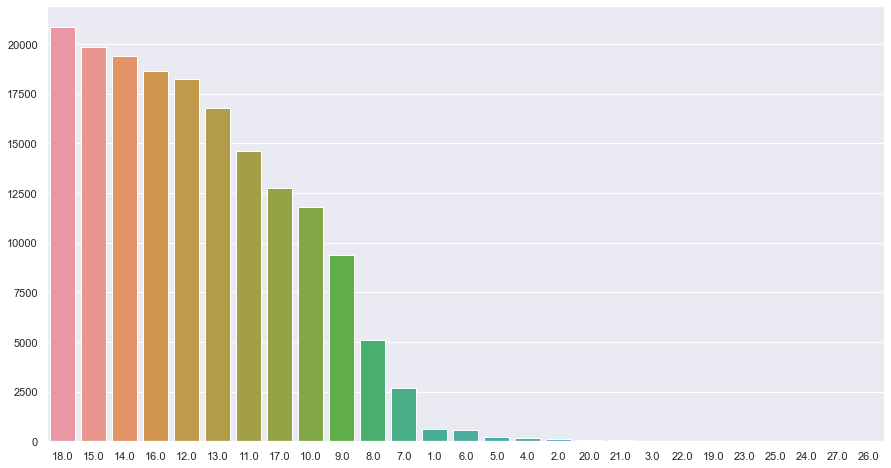

In [11]:
champLevel_counts = pd.DataFrame(data['champLevel'].value_counts())
sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(data = champLevel_counts.T)

18(만렙)을 넘는 숫자에 의구심이 생긴다. 우르프 모드가 잘못들어온것일지도.

In [12]:
data[data['champLevel'] > 18]['champLevel'].value_counts()

20.0    49
21.0    45
22.0    33
19.0    32
23.0     5
25.0     2
24.0     2
27.0     1
26.0     1
Name: champLevel, dtype: int64

도움 안되는 데이터들이므로 제거하자.

In [13]:
data = data[data['champLevel'] <= 18]

## 3-5. 티어 균형 맞춰주기

In [14]:
tier_counts

,tier
MASTER,41000
GRANDMASTER,41000
CHALLENGER,41000
PLATINUM,13400
GOLD,13200
SILVER,12800
DIAMOND,9600


마스터, 그랜드마스터, 챌린저가 40000이 넘고 다른 티어들은 10000개 언저리이다. 따라서 30%정도만 취한다.

In [15]:
from sklearn.model_selection import train_test_split
new_data = pd.DataFrame()

master_data, _ = train_test_split(data[data['tier'] == 'MASTER'], test_size= 0.3, shuffle = True)
gm_data, _ = train_test_split(data[data['tier'] == 'GRANDMASTER'], test_size= 0.3, shuffle = True)
challenger_data, _ = train_test_split(data[data['tier'] == 'CHALLENGER'], test_size= 0.3, shuffle = True)

new_data = pd.concat([new_data, master_data])
new_data = pd.concat([new_data, gm_data])
new_data = pd.concat([new_data, challenger_data])
new_data = pd.concat([new_data, data[data['tier'] == 'SILVER']])
new_data = pd.concat([new_data, data[data['tier'] == 'GOLD']])
new_data = pd.concat([new_data, data[data['tier'] == 'PLATINUM']])
new_data = pd.concat([new_data, data[data['tier'] == 'DIAMOND']])

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171830 entries, 0 to 171999
Data columns (total 16 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   position                     171830 non-null  object 
 1   tier                         171830 non-null  object 
 2   gameDuration                 171830 non-null  int64  
 3   champLevel                   171830 non-null  float64
 4   kills                        171830 non-null  float64
 5   deaths                       171830 non-null  float64
 6   assists                      171830 non-null  float64
 7   totalDamageDealtToChampions  171830 non-null  float64
 8   damageSelfMitigated          171830 non-null  float64
 9   totalHeal                    171830 non-null  float64
 10  totalMinionsKilled           171830 non-null  float64
 11  neutralMinionsKilled         171830 non-null  float64
 12  wardsPlaced                  171830 non-null  float64
 13 

## 3-6. 더미변수 변환

position 및 tier의 경우 더미변수이므로 변환시켜준다.

In [17]:
data = pd.get_dummies(data, columns=['position'], drop_first = True)
data = pd.get_dummies(data, columns=['tier'], drop_first = True)

## 3-7. 상관계수 분석

<AxesSubplot:>

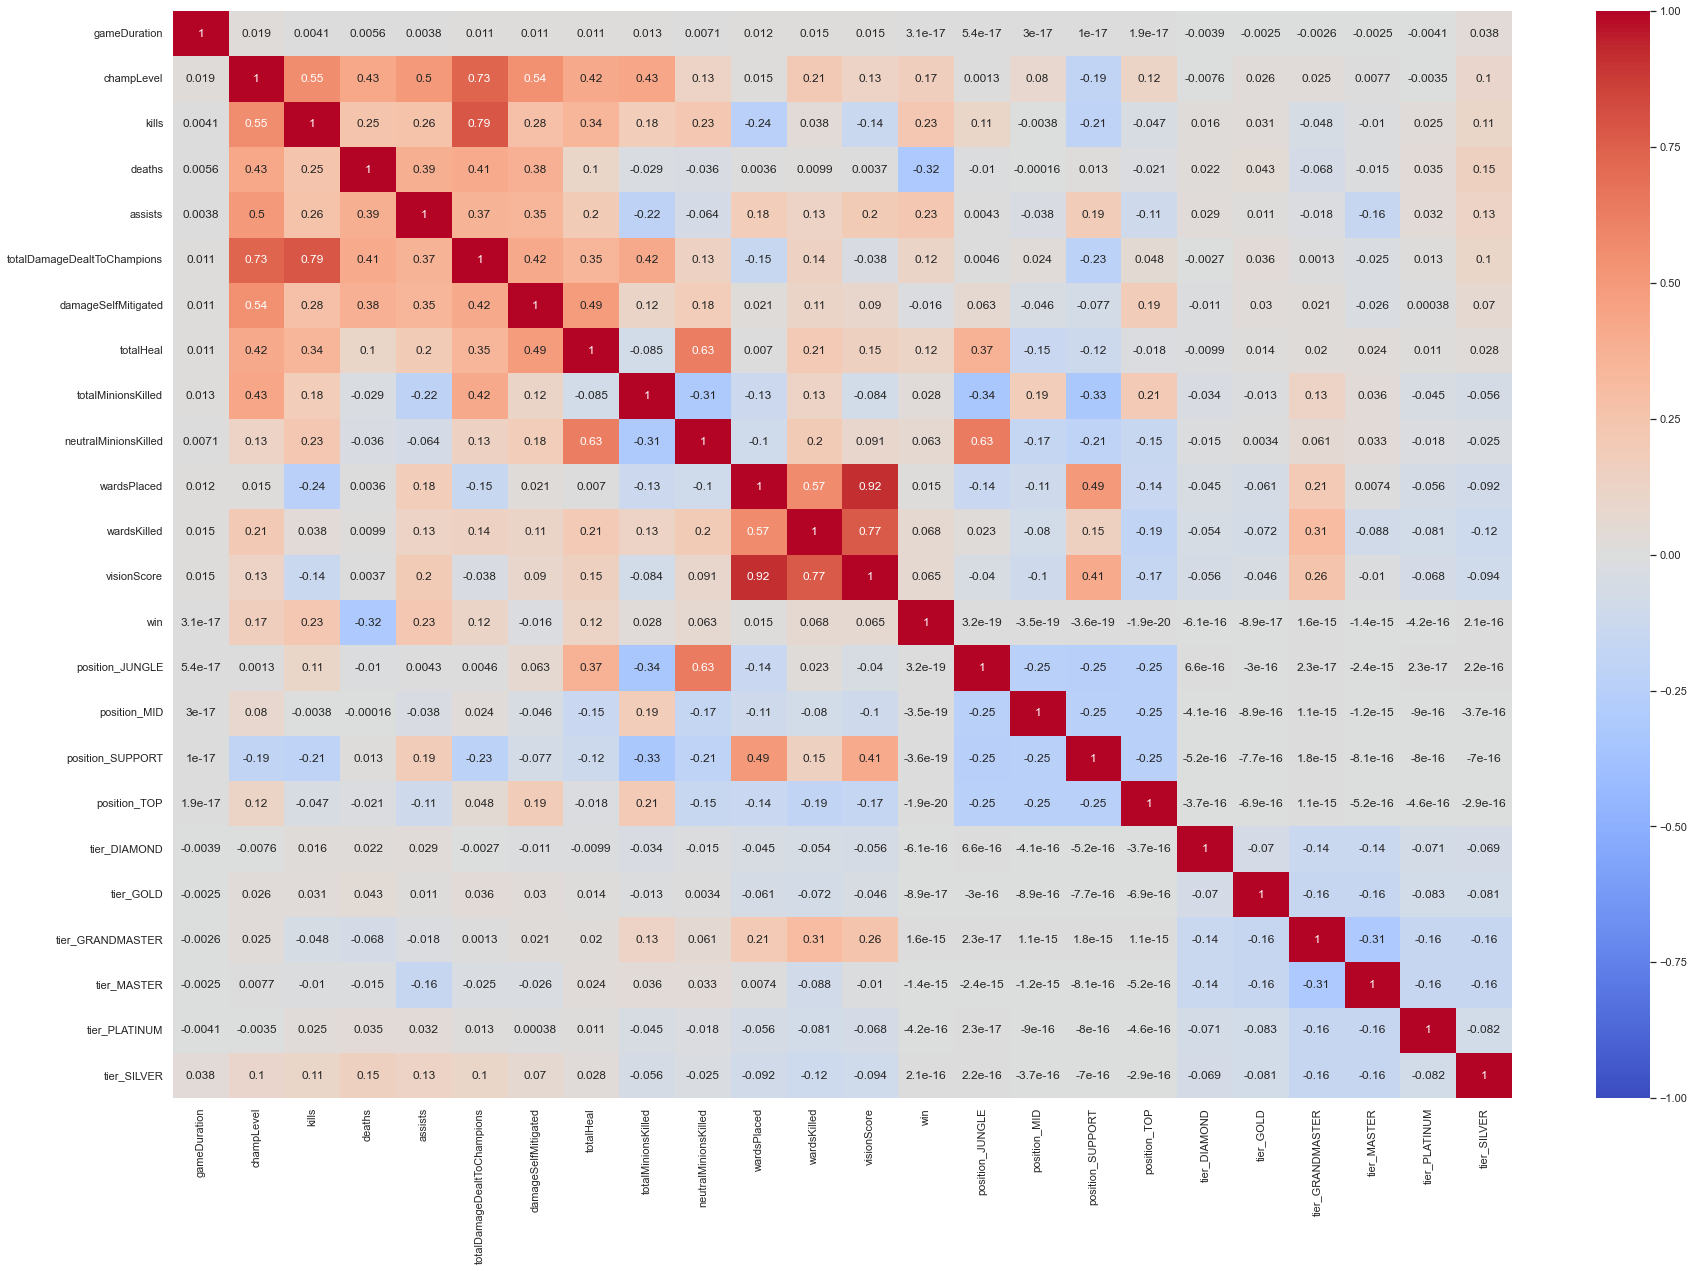

In [18]:
sns.set(rc = {'figure.figsize': (30, 20)})
sns.heatmap(data.corr(), cmap='coolwarm', vmin=-1, vmax=1,annot=True)

- `visionScore`와 `wardskilled`는 상관계수가 너무 높다. 하나만 쓰던가 해야겠다.
- `gameDuration`은 생각보다 미치는 영향이 적었다. 스케일이 커서 그럴지도.
- `nuetralMinionskilled`는 정글 cs에 대한 지표이다. 따라서 `JUNGLE`포지션과 0.63의 높은 상관관계를 보인다.
- `SUPPORT`포지션은 와드와 관련해서 높은 상관관계를 지닌다.
- `GRANDMASTER`와 시야관련 지표가 높은 상관관계를 보인다.

In [19]:
data = data.drop('wardsKilled', axis = 1)

`visionScore`가 `wardskilled`와 비슷하지만 좀 더 포괄적인 개념이므로 `wardskilled`를 drop한다.

## 3-8. 독립변수, 종속변수 나누기 & 스케일링

In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

data = shuffle(data, random_state = random_seed)

X = data.drop('win', axis = 1)
y = data['win']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=random_seed)

st_scaler = StandardScaler()
X_train_scaled = st_scaler.fit_transform(X_train)
X_test_scaled = st_scaler.fit_transform(X_test)

# 4. 모델링

In [21]:
import xgboost as xgb

model = xgb.XGBClassifier(n_estimators = 500, max_depth = 5, random_state = random_seed)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=2023, ...)

In [22]:
pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print('accuracy_score : ', accuracy_score(y_test, pred))
print('f1_score : ', f1_score(y_test, pred))
print('precision_score : ', precision_score(y_test, pred))
print('recall_score : ', recall_score(y_test, pred))

accuracy_score :  0.9702322062503638
f1_score :  0.9702209414024976
precision_score :  0.9708144005592451
recall_score :  0.9696282073660325


## 4-1. 모델 저장하기

In [23]:
import pickle
import joblib

joblib.dump(model, 'model.pkl')

['model.pkl']

## 4-2. 그리드 서치

In [24]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    'n_estimators': [100, 500, 800],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'max_depth': [5, 10, 15, 20],
    'subsample': [0.6, 0.8, 1]
}

grid_model = xgb.XGBClassifier(random_state = random_seed)

rs = RandomizedSearchCV(grid_model, param_distributions=params, n_iter = 30, scoring = 'roc_auc', random_state=random_seed, n_jobs=-1)

rs.fit(X_train, y_train, verbose = 1)

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           max_leaves=None,
                                           min_child_we

In [25]:
rs.best_params_

{'subsample': 0.8, 'n_estimators': 500, 'max_depth': 20, 'learning_rate': 0.05}

In [27]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

rs_proba = rs.predict_proba(X_test)
roc_auc_score(y_test, rs_proba[:, 1])

0.9977045793830213

In [28]:
for prob in rs_proba[:5]:
    print(prob)

[0.6268689 0.3731311]
[9.9988246e-01 1.1751465e-04]
[0.0047611 0.9952389]
[0.12527013 0.8747299 ]
[7.7366829e-05 9.9992263e-01]


In [29]:
pred = rs.predict(X_test)

print('accuracy_score : ', accuracy_score(y_test, pred))
print('f1_score : ', f1_score(y_test, pred))
print('precision_score : ', precision_score(y_test, pred))
print('recall_score : ', recall_score(y_test, pred))

accuracy_score :  0.9745387883373101
f1_score :  0.9745469354510283
precision_score :  0.9744618964514252
recall_score :  0.974631989294234


전체적으로 조금씩 나아진 모습이다.

In [30]:
joblib.dump(rs, 'model_grid.pkl')

['model_grid.pkl']

## 4-3. IsotonicRegression 활용하여 승률 근사하기

처음에는 로짓값을 활용하고자 했으나, 승에 대한 예측일 뿐 승률은 아니기 때문에 사용할 수 없었다. 따라서 비선형 모델인 XGBoost에 적용할 수 있는 `IsotonicRegression`을 활용하여 승률에 근사시킨다.

참고
- https://towardsdatascience.com/pythons-predict-proba-doesn-t-actually-predict-probabilities-and-how-to-fix-it-f582c21d63fc
- https://3months.tistory.com/490

In [31]:
from sklearn.isotonic import IsotonicRegression

prob_test = model.predict_proba(X_test)
prob_test.reshape(-1, 1)

iso_reg = IsotonicRegression(y_min = 0, y_max = 1, out_of_bounds='clip').fit(prob_test.T[-1], y_test)

proba_test_model_isoreg = iso_reg.predict(model.predict_proba(X_test)[:, 1])

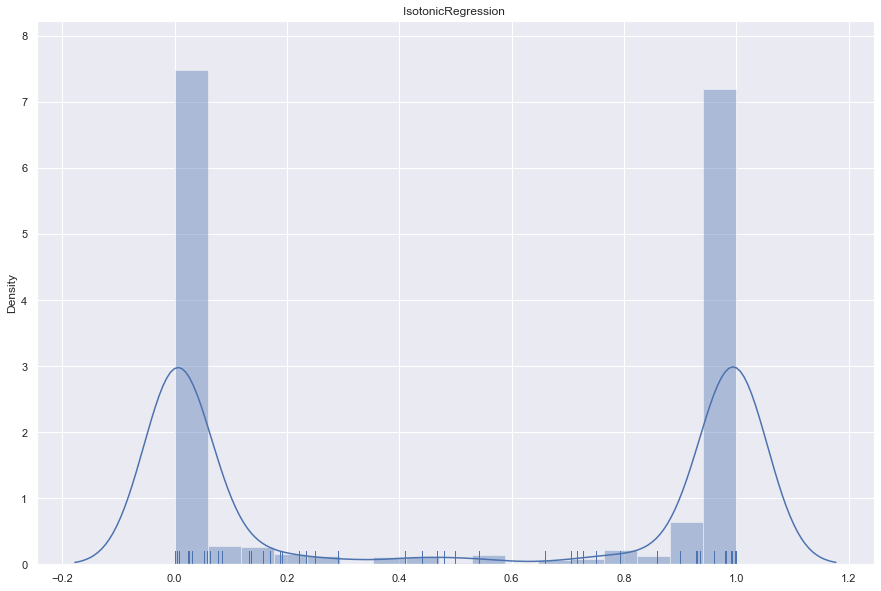

In [33]:
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')
np.set_printoptions(precision=6, suppress=True)

sns.distplot(proba_test_model_isoreg, kde=True, rug=True)
sns.set(rc = {'figure.figsize': (15, 10)})
plt.title("IsotonicRegression ")
plt.show()

하지만, 다소 극단적인 모형을 보여줘서 1인분을 계산하기 위한 지표로는 좋아보이지 않는다.

따라서 해당값을 통해 팀내에서 상대적인 인분 지표를 구하기로 결정했다.

## 5. 결과 테스트

라이엇 API을 통해, 최근 직접했던 게임으로 인분 지표를 계산해본다.

In [37]:
import requests

API_KEY = "RGAPI-221d4c9f-4589-40e2-893f-6bd383cebd2f"

sohwan_url = "https://kr.api.riotgames.com/lol/summoner/v4/summoners/by-name/" +'롤 재밌다 억지아님' +'?api_key=' + API_KEY
r = requests.get(sohwan_url)
sohwan_info = r.json()

puuid = sohwan_info['puuid']
matche_url = "https://asia.api.riotgames.com/lol/match/v5/matches/by-puuid/"+puuid+"/ids?start=0&count=20&api_key="+API_KEY
r = requests.get(matche_url)
matches = r.json()

In [62]:
from collections import defaultdict
import requests

def get_test_df(response, data_columns):
    db = defaultdict(list)
    
    position = {0: 'TOP', 1: 'JUNGLE', 2: "MID", 3: "AD_CARRY", 4: "SUPPORT"}
    participant_data = response['info']['participants']
    gameDuration = response['info']['gameDuration']
    
    summonerNames = []
    for k in range(10):
        summonerName = response['info']['participants'][k]['summonerName']

        summonerNames.append(summonerName)
        
        sohwan_url = "https://kr.api.riotgames.com/lol/summoner/v4/summoners/by-name/" + summonerName +'?api_key=' + API_KEY
        r = requests.get(sohwan_url)
        sohwan_info = r.json()
        summonerID = sohwan_info['id']

        league_url = "https://kr.api.riotgames.com/lol/league/v4/entries/by-summoner/"+ summonerID +"?api_key=" + API_KEY
        r = requests.get(league_url)
        league_info = r.json()
    
        db['position'].append(position[k%5])
        db['gameDuration'].append(gameDuration)
    
        for column in ['champLevel', 'kills', 'deaths', 'assists','totalDamageDealtToChampions', 'damageSelfMitigated', 'totalHeal', 'totalMinionsKilled', 'neutralMinionsKilled', 'wardsPlaced','visionScore', 'win']:
            db[column].append(participant_data[k][column])
    
        # 티어
        for league in league_info:
            if league["queueType"] == "RANKED_SOLO_5x5":
                db['tier'].append(league["tier"])
                break
        else:
            # 언랭은 실버 취급
            db['tier'].append("SILVER")
    
    result_df = pd.DataFrame(columns = data_columns)
    
    for k, column in enumerate(data_columns):
        if k <= 12:
            result_df[column] = db[column]
        elif k <= 16:
            if 'JUNGLE' in column:
                result_df[column] = [1 if x == 'JUNGLE' else 0  for x in db['position']]
            elif 'MID' in column:
                result_df[column] = [1 if x == 'MID' else 0  for x in db['position']]
            elif 'SUPPORT' in column:
                result_df[column] = [1 if x == 'SUPPORT' else 0  for x in db['position']]
            elif 'TOP' in column:
                result_df[column] = [1 if x == 'TOP' else 0  for x in db['position']]
        else:
            if 'DIAMOND' in column:
                result_df[column] = [1 if x == 'DIAMOND' else 0  for x in db['tier']]
            elif 'GOLD' in column:
                result_df[column] = [1 if x == 'GOLD' else 0  for x in db['tier']]
            elif 'GRANDMASTER' in column:
                result_df[column] = [1 if x == 'GRANDMASTER' else 0  for x in db['tier']]
            elif 'MASTER' in column:
                result_df[column] = [1 if x == 'MASTER' else 0  for x in db['tier']]            
            elif 'PLATINUM' in column:
                result_df[column] = [1 if x == 'PLATINUM' else 0  for x in db['tier']]  
            elif 'SILVER' in column:
                result_df[column] = [1 if x == 'SILVER' else 0  for x in db['tier']]  
                
    return result_df, summonerNames


In [98]:
data_columns

Index(['gameDuration', 'champLevel', 'kills', 'deaths', 'assists',
       'totalDamageDealtToChampions', 'damageSelfMitigated', 'totalHeal',
       'totalMinionsKilled', 'neutralMinionsKilled', 'wardsPlaced',
       'visionScore', 'win', 'position_JUNGLE', 'position_MID',
       'position_SUPPORT', 'position_TOP', 'tier_DIAMOND', 'tier_GOLD',
       'tier_GRANDMASTER', 'tier_MASTER', 'tier_PLATINUM', 'tier_SILVER'],
      dtype='object')

In [66]:
data_columns = data.columns

test_db = {}
champion_db = defaultdict(list)
win_rate_db = defaultdict(list)



for k, match in enumerate(matches):
    if k == 5:
        break
    
    api_url = "https://asia.api.riotgames.com/lol/match/v5/matches/"+match+"?api_key="+API_KEY
    response = requests.get(api_url)
    response = response.json()
    
    test_df, summonerNames = get_test_df(response, data_columns)
    
    champion_db[k] = summonerNames
    
    X_test = test_df.drop('win', axis = 1)
    y_test = test_df['win']
    
    prob_test = rs.predict_proba(X_test)
    prob_test.reshape(-1, 1)

    iso_reg = IsotonicRegression(y_min = 0, y_max = 1, out_of_bounds='clip').fit(prob_test.T[-1], y_test)

    proba_test_model_isoreg = iso_reg.predict(model.predict_proba(X_test)[:, 1])
    
    win_rate_db[k] = list(proba_test_model_isoreg)


In [95]:
from tabulate import tabulate

result = []

for k in range(3):
    a_team = win_rate_db[k][:4]
    b_team = win_rate_db[k][5:]
    
    a_avg = sum(a_team)/len(a_team)
    b_avg = sum(b_team)/len(b_team)
  
    for idx, value in enumerate(win_rate_db[k]):
        if idx <= 4:
            win_rate_db[k][idx] = (value/a_avg)
        else:
            win_rate_db[k][idx] = (value/b_avg)
    
        
        
        
    for a, b in zip(champion_db[k], win_rate_db[k]):
        result.append([a, b])
        #print(f'{a}님은     {b: .3f}인분을 했습니다.')

In [96]:
print(tabulate(result, headers=["닉네임", "몇인분?"]))

닉네임                몇인분?
------------------  ---------
성장하는 아재        1
람보르르르기니       1
롤 재밌다 억지아님   1
먼지가되는정준영     1
결연한연걸           1
Never stop Lust      0
I 만 개 화 I         0
각 성 태 세          0
All the colors       0
실패자 태현          5
마오야 넌 잘했어     3.55679
무슨커피좋아해요     0.443209
수방사지킴이         0
이렐아 넌 잘했어     0
카페라떼좋아해요     3.97459
제드있냐             1.36364
LOL로로로로로        0.454545
롤 재밌다 억지아님   0.454545
결연한연걸           1.36364
19학번 김작수        1.36364
얘들아치킨왔어       0
롤 재밌다 억지아님   0
궈뇽지               0
BigThors             4
결연한연걸           4
쭈찌헌               1.27508
방 호 리 신          1.27508
Jam쥐                0
임씨청년             1.17477
ImNotAfraid          1.27508
